In [1]:
#Imports

from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
    

Using TensorFlow backend.


In [2]:
#Global Variables
train_dir = 'data/train/'
new_size = (256,256)

In [3]:
im_mask = Image.open(train_dir+'3594_mask.png')
im_sat = Image.open(train_dir+'3594_sat.jpg')

resized_mask = im_mask.resize(new_size)
resized_sat = im_sat.resize(new_size)


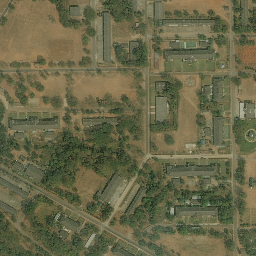

In [4]:
resized_sat

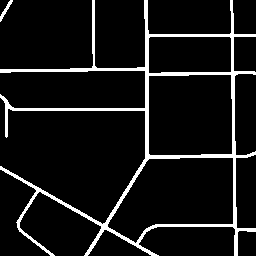

In [5]:
resized_mask

In [6]:
resized_mask_matrix = np.asarray(resized_mask.convert("L"))
resized_sat_matrix = np.asarray(resized_sat.convert("RGB"))

In [7]:
value = 0
while value == 0:
    pos = tuple(np.random.choice(256,2))
    value = resized_mask_matrix[pos]

print(pos)

(91, 233)


In [8]:
def is_valid_center(pos, patch_size, image_size):
    delta = patch_size//2
    return not (pos[0]-delta < 0 or pos[0] + delta > image_size or pos[1] - delta < 0 or pos[1] + delta > image_size)

def get_patch(mask, image, patch_size=32):
    value = 0
    pos = (0,0)
    while value == 0 or not is_valid_center(pos, patch_size, image.shape[0]):
        pos = tuple(np.random.choice(256,2))
        value = resized_mask_matrix[pos]
    return mask[pos[0]-patch_size//2 : pos[0]+patch_size//2, pos[1]-patch_size//2 : pos[1]+patch_size//2  ], image[pos[0]-patch_size//2 : pos[0]+patch_size//2, pos[1]-patch_size//2 : pos[1]+patch_size//2, :  ]

    

In [9]:
for i in range(100):
    get_patch(resized_mask_matrix, resized_sat_matrix)

In [10]:
mask_patch = Image.fromarray(resized_mask_matrix.astype('uint8'), 'L')
image_patch = Image.fromarray(resized_sat_matrix.astype('uint8'), 'RGB')

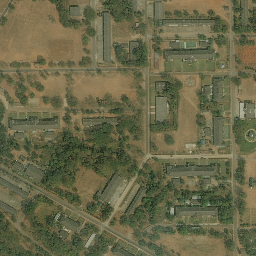

In [11]:
image_patch

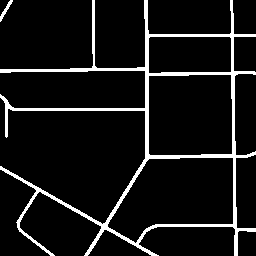

In [12]:
mask_patch

In [13]:
#Prepare data
np.random.seed(44)

X_train, Y_train = [], []

for i in range(100):
    mask_patch, im_patch = get_patch(resized_mask_matrix, resized_sat_matrix)
    X_train.append(im_patch)
    Y_train.append(mask_patch)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape)

(100, 32, 32, 3)


In [62]:
# Model definition
activation = "prelu"
num_layers = 10
loss_function = "logcosh"
optimizer_algorithm = "adam"

In [63]:
# Model

model = Sequential()
model.add(Dense(256, input_shape=(32*32*3,)))
model.add(Activation(activation))
for i in range(num_layers):
    model.add(Dense(256))
    model.add(Activation(activation))
model.add(Dense(32*32))
model.add(Activation(activation))

model.summary()

model.compile(loss=loss_function, optimizer=optimizer_algorithm, metrics=["accuracy"])

ValueError: Unknown activation function:prelu

In [64]:
print(Y_train.reshape(100,32*32).shape)
model.fit(X_train.reshape(100,32*32*3), Y_train.reshape(100,32*32), epochs=1000, shuffle=True, verbose=1, batch_size=64)


(100, 1024)


RuntimeError: The model needs to be compiled before being used.

In [57]:
Y = model.predict(X_train.reshape(100,32*32*3), batch_size=10000)
k = 0
Y = Y.reshape(100,32,32)

In [58]:
Y = Y > 126

In [59]:
print(Y[0])

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


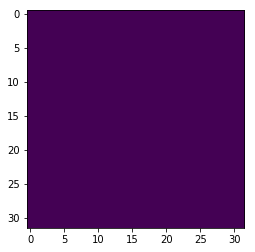

In [65]:
%matplotlib inline
num=50
plt.imshow(Y[num])

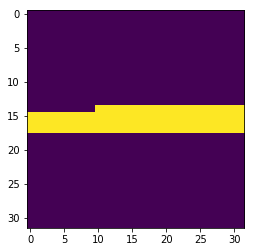

In [66]:
plt.imshow(Y_train[num])

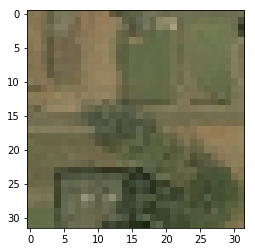

In [67]:
plt.imshow(X_train[num])

  Could not find a version that satisfies the requirement unet (from versions: )
No matching distribution found for unet
